# Image Processing

#### Load the packages and import the data

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_lfw_people

data = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [193]:
n_samples, h, w = data.images.shape

#### Split data into an X DataFrame and y vector

In [194]:
X = data.data
y = data.target

In [195]:
n_features = X.shape[1]

In [196]:
X.shape

(1288, 1850)

#### Examine the target labels and some example images

In [197]:
target_labels = data.target_names
pd.DataFrame(target_labels, columns=["Name"])

,Name
0,Ariel Sharon
1,Colin Powell
2,Donald Rumsfeld
3,George W Bush
4,Gerhard Schroeder
5,Hugo Chavez
6,Tony Blair


'Hugo Chavez'

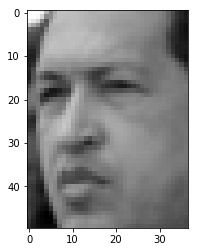

In [198]:
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
data.target_names[y[0]]

'Tony Blair'

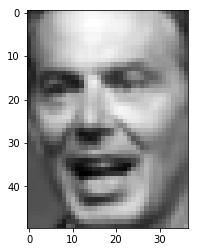

In [199]:
plt.imshow(X[1].reshape((h, w)), cmap=plt.cm.gray)
data.target_names[y[1]]

'Colin Powell'

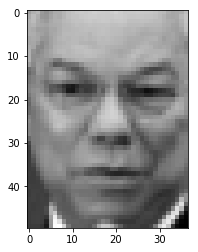

In [200]:
plt.imshow(X[40].reshape((h, w)), cmap=plt.cm.gray)
data.target_names[y[40]]

#### Split the data into a train_set and test_set

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1111)

## Fit Dataset to Models

#### Fit the Base Logistic Regression Model

In [202]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predict on Test Set

In [158]:
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)

pred_summary = pd.DataFrame(y_prob.round(4))
pred_summary["Actual"] = y_test
pred_summary["y_pred"] = y_pred
pred_summary.head()

,0,1,2,3,4,5,6,y_pred,Actual
0,0.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0000,1,1
1,0.0003,0.0010,0.0634,0.0000,0.9241,0.0,0.0112,4,4
2,0.0000,0.0000,0.0000,0.9983,0.0000,0.0,0.0017,3,3
3,0.0001,0.0045,0.6298,0.0000,0.0012,0.0,0.3644,2,1
4,0.0000,0.0000,0.0001,0.0000,0.0000,0.0,0.9999,6,6


In [159]:
pd.DataFrame(target_labels, columns=["Name"])

,Name
0,Ariel Sharon
1,Colin Powell
2,Donald Rumsfeld
3,George W Bush
4,Gerhard Schroeder
5,Hugo Chavez
6,Tony Blair


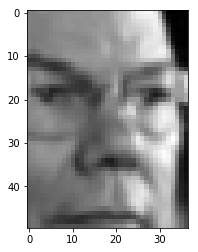

In [160]:
plt.imshow(X_test[319].reshape((h, w)), cmap=plt.cm.gray)

#### Evaluate the Base Logistic Regression Model

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Base Logistic Regression Model (L2 Regularization)", "\n")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)), 
      "      Accuracy:", round(accuracy_score(y_test, y_pred), 3), 
      "\n")
print(classification_report(y_test, y_pred))

Logistic Regression Model (L2 Regularization) 

    0   1   2    3   4  5   6
0  17   2   0    1   1  1   0
1   1  56   2    4   0  2   1
2   0   1  20    4   1  1   1
3   1   4   3  115   0  0   1
4   0   0   3    6  24  0   1
5   0   0   0    5   1  8   0
6   0   1   0    2   1  0  30       Accuracy: 0.839 

             precision    recall  f1-score   support

          0       0.89      0.77      0.83        22
          1       0.88      0.85      0.86        66
          2       0.71      0.71      0.71        28
          3       0.84      0.93      0.88       124
          4       0.86      0.71      0.77        34
          5       0.67      0.57      0.62        14
          6       0.88      0.88      0.88        34

avg / total       0.84      0.84      0.84       322



## Implement PCA on Features

#### Scale Features

In [176]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
X_train_scaled = X_train_df.copy()
X_test_scaled = X_test_df.copy()
for i in X_train_df.columns:
    if X_train_df[i].dtypes in ["float64", "int64", "float32", "int32"]:
        m = X_train_df[i].mean()
        s = X_train_df[i].std()
        X_train_scaled[i] = (X_train_df[i] - m) / s
        X_test_scaled[i] = (X_test_df[i] - m) / s

#### Perform PCA

In [216]:
from sklearn.decomposition import PCA
components = 500  # Select this value
pca = PCA(n_components = components)  
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

#### Use "Elbow Method" to select an optimal number of components
This step might be ignored since you still need to pick at least 100 components to get close to an accurate prediction

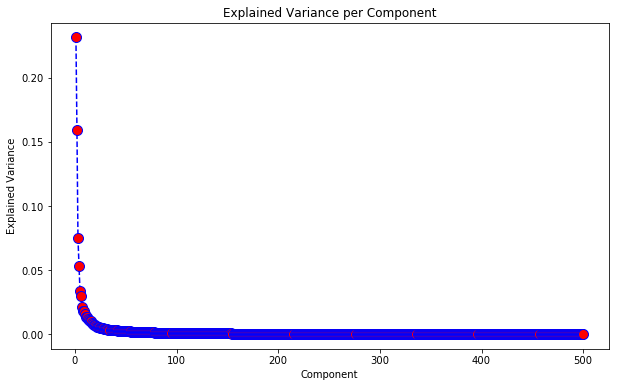

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(range(1, components + 1), pca.explained_variance_ratio_, 
         color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Explained Variance per Component')
plt.xlabel('Component')
plt.ylabel('Explained Variance')

In [218]:
components = 100  # Select this value
pca = PCA(n_components = components)  
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

#### Fit to Logistic Regression Model with PCA Features & Evaluate Model

In [219]:
pca_log_model = LogisticRegression()
pca_log_model.fit(X_train_reduced, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [220]:
pca_y_pred = pca_log_model.predict(X_test_reduced)
pca_y_prob = pca_log_model.predict_proba(X_test_reduced)

new_pred_summary = pd.DataFrame(pca_y_prob.round(4))
new_pred_summary["Actual"] = y_test
new_pred_summary["pca_y_pred"] = pca_y_pred
new_pred_summary["base_y_pred"] = y_pred
new_pred_summary.head()

,0,1,2,3,4,5,6,Actual,pca_y_pred,base_y_pred
0,0.0006,0.8722,0.0008,0.0000,0.0003,0.0012,0.1249,1,1,1
1,0.0316,0.0280,0.3496,0.0154,0.2974,0.0050,0.2730,4,2,4
2,0.0163,0.0000,0.0020,0.6118,0.0000,0.0001,0.3697,3,3,3
3,0.3599,0.0028,0.5992,0.0002,0.0232,0.0000,0.0147,1,2,2
4,0.0020,0.0063,0.1476,0.0318,0.0000,0.0007,0.8115,6,6,6


In [221]:
print("PCA Reduced Logistic Regression Model", "\n")
print(pd.DataFrame(confusion_matrix(y_test, pca_y_pred)), 
      "      Accuracy:", round(accuracy_score(y_test, pca_y_pred), 3), 
      "\n")
print(classification_report(y_test, pca_y_pred))

PCA Reduced Logistic Regression Model 

    0   1   2    3   4  5   6
0  18   3   1    0   0  0   0
1   2  56   3    2   1  1   1
2   1   2  19    3   1  1   1
3   0   4   3  113   1  2   1
4   0   0   2    6  25  0   1
5   0   0   0    4   2  8   0
6   2   0   0    2   0  0  30       Accuracy: 0.835 

             precision    recall  f1-score   support

          0       0.78      0.82      0.80        22
          1       0.86      0.85      0.85        66
          2       0.68      0.68      0.68        28
          3       0.87      0.91      0.89       124
          4       0.83      0.74      0.78        34
          5       0.67      0.57      0.62        14
          6       0.88      0.88      0.88        34

avg / total       0.83      0.84      0.83       322

